<a href="https://colab.research.google.com/github/Marcos-Sanson/UC3M-Web-Analytics/blob/main/Graph_Theory_Lab_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEB ANALYTICS – Data Science and Engineering Degree  
## *(1st Semester, 4th-Year-Level Course)*  

### Graph Theory Lab  

This lab was part of my Web Analytics course at **Universidad Carlos III de Madrid (UC3M)**, where I studied abroad from **September 2024 to December 2024** as part of my Computer Science degree. This specific course was part of the Data Science and Engineering Degree at UC3M. The course focused on applying **graph theory** to web analytics, exploring network structures, link analysis, and ranking algorithms.  

Working in a group of three students, we implemented and analyzed graph-based models using **Python** and the **NetworkX** library to study web connectivity, information diffusion, and centrality measures.

We constructed and analyzed various types of graph models, including **Erdős-Rényi, Barabási-Albert, and small-world networks**. Our work involved implementing fundamental graph algorithms, such as shortest path computation and centrality measures (**degree, closeness, betweenness, and PageRank**). We also explored **community detection techniques**, applying **Louvain, Label Propagation, and Greedy Modularity** methods to identify network clusters.  

Beyond these fundamental analyses, we implemented **k-core decomposition and onion decomposition** to examine the hierarchical structure of networks. Additionally, we computed **modularity scores** to evaluate the effectiveness of different community detection algorithms, comparing our custom implementations with the built-in NetworkX functions.  

The lab was structured around a series of milestones, requiring us to progressively develop and validate our implementations before presenting our solutions. Each milestone encouraged deeper engagement with graph theory concepts and their practical applications in web analytics. Our performance was evaluated based on the number of milestones successfully completed and the correctness of our implementations.  

Through this lab, we improved our understanding of **network analysis** and gained further experience in **Python** within the context of large-scale web graphs.


# 0. Lab Preparation

Students should prepare the lab by completing the following two tasks:



1.   Studying and thus having understood the concepts explained in the theoretical classes.

2.   Gain experience with the use of the [NetworkX Python Library](https://networkx.org/documentation/stable/reference/index.html). The different exercises to be solved during the lab will be mainly based on the utilization of functions offered by this library.

>* [Here](https://networkx.org/nx-guides/content/tutorial.html) you can find a very basic tutorial. (Consider this tutorial, just as a starting point. To prepare the lab, it is expected that you go further than what is covered in this very simple tutorial)

3. It is assumed students have experience in using Python notebooks. Either a local installation (e.g., local python installation + Jupyter) or a cloud-based solution (e.g., Google Colab). *We recommend the second option*.




#1. Lab Introduction

- In this lab we will implement different metrics and algorithms we have covered in the theoretical classes.

- The lab will be done in groups of 2 people.

- The lab defines a set of milestones the students must complete. Upon the completion of every milestone students should call the professor, who will check the correctness of the solution (*If the professor is busy, do not wait for them, move to the next milestone*).

- **The final mark will be computed as function of the number of milestones successfully completed.**

- **Each group should also share their lab notebook with the professor upon the finalization of the lab.**

- In this lab we will use the [NetworkX Phython]( https://networkx.org/documentation/stable/reference/index.html) library for the analysis of graphs and networks. As indicated in the *Lab Preparation* section above, it is expected that students have gained experience in the use of the NetworkX library before starting the first session of the lab.

- It is  recommended to use [Google Colab](https://colab.research.google.com/) to produce the Python notebook with the solution of the lab. Of course, if any student prefers using its local programming environment (e.g., jupyter) and python installation, they is  welcome to do so.

- *Note that most of the milestones consists in the implementation of metrics or algorithms which are already implemented in NetworkX. Hence, before calling the professor for checking the correctness of a milestone, it is highly recommended that students compare the result obtained with their solution and the equivalent function of NetworkX. The results should match. For instance, if a milestone requires to implement the Betweenness Centrality metric, students can check if their implementation of this metric is correct by comparing it with the result offered by the [betweenness centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality) from the NetworkX library.*


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import time


# MILESTONE 0

a) Generate a directed graph with 5 nodes and 6 edges between those nodes.
*We recommend you to use the functions add_nodes_from and add_edges_from*

b) Plot the resulting graph. You can use the following code for that purpose:


```
# We assume the graph is created in the variable G
import networkx as nx
import matplotlib.pyplot as plt
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.title("My first Graph")
plt.show()
```



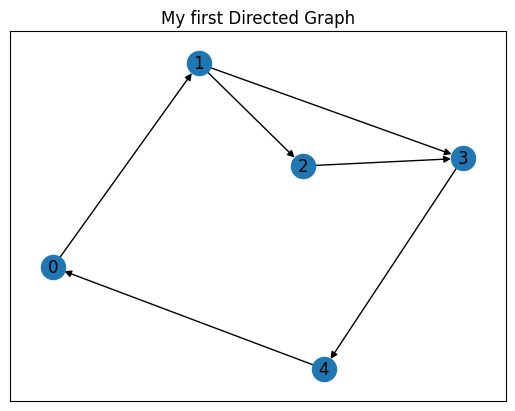

In [3]:
G = nx.DiGraph()
G.add_nodes_from(range(5))
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4), (4, 0), (1, 3)])

# Plotting the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.title("My first Directed Graph")
plt.show()


c) Generate an Erdös-Renyi graph with 10 nodes and a probability of creating an edge of 0.4 using the networkX's function ```erdos_renyi_graph```

d) Plot the resulting graph

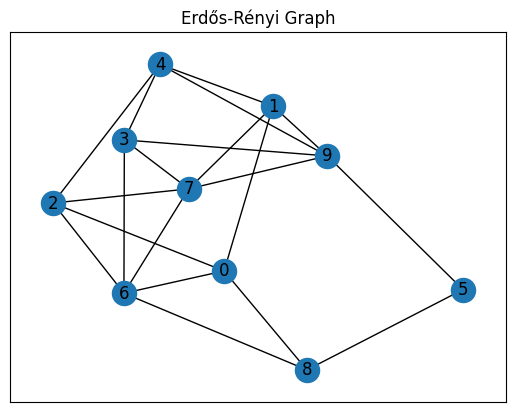

In [5]:
G_er = nx.erdos_renyi_graph(10, 0.4)

# Plotting the Erdős-Rényi graph
pos = nx.spring_layout(G_er)
nx.draw_networkx(G_er, pos)
plt.title("Erdős-Rényi Graph")
plt.show()


e) Generate an undirected Barabasi-Albert graph with 10 nodes and each nodes creating 3 edges upon joining the graph using the networkX's function ```barabasi_albert_graph```

f) Plot the resulting graph

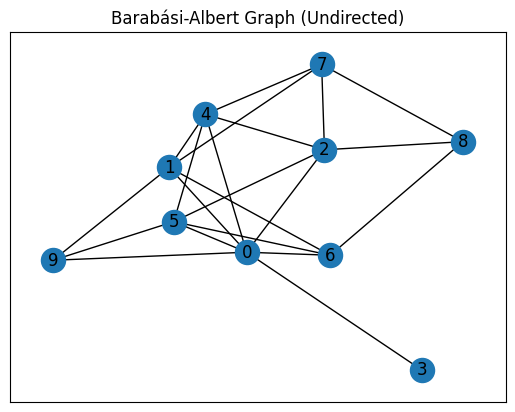

In [6]:
G_ba = nx.barabasi_albert_graph(10, 3)

# Plotting the Barabási-Albert graph
pos = nx.spring_layout(G_ba)
nx.draw_networkx(G_ba, pos)
plt.title("Barabási-Albert Graph (Undirected)")
plt.show()


g) Generate a directed Barabasi-Albert graph with 10 nodes using the networkX's function ```scale_free_graph```

h) Plot the resulting graph

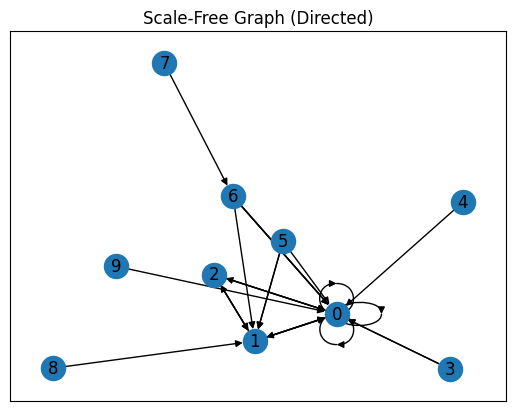

In [9]:
G_sf = nx.scale_free_graph(10)

# Plotting the directed Barabási-Albert graph
pos = nx.spring_layout(G_sf)
nx.draw_networkx(G_sf, pos)
plt.title("Scale-Free Graph (Directed)")
plt.show()


i) Generate a small-world graph with 20 nodes, 4 edges per node and a replacement probability of 0.2 using the networkX's function ```newman_watts_strogatz_graph```

j) Plot the resulting graph

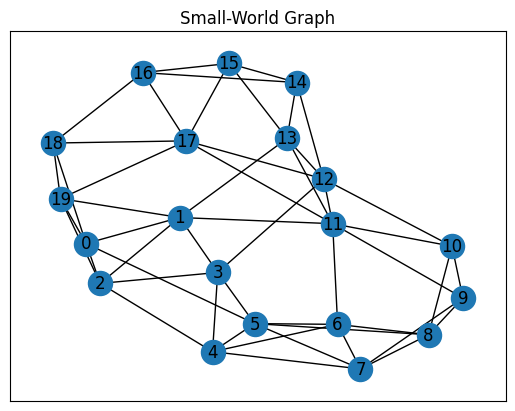

In [10]:
G_sw = nx.newman_watts_strogatz_graph(20, 4, 0.2)

# Plotting the small-world graph
pos = nx.spring_layout(G_sw)
nx.draw_networkx(G_sw, pos)
plt.title("Small-World Graph")
plt.show()


# MILESTONE 1

a) Write the code to construct from scratch an **unidirected** random graph with 10 nodes using the Gilbert model, i.e., the probability of an edge existing between a pair of nodes is p. For this exercise use p = 0.4.

- *Note that you cannot use any of the functions that automatically creates a random graph from NetworkX library.*

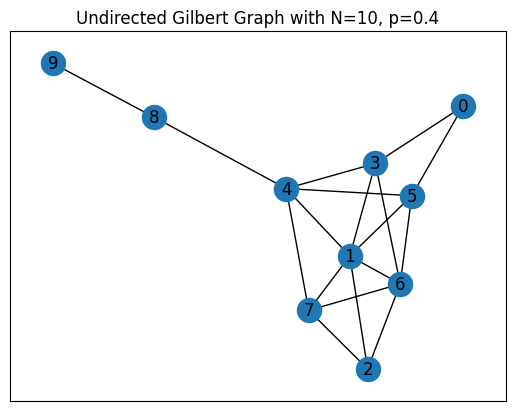

In [11]:
def gilbert_graph_undirected(n, p):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for i in range(n):
        for j in range(i+1, n):
            if random.random() < p:
                G.add_edge(i, j)
    return G

G_undirected_gilbert = gilbert_graph_undirected(10, 0.4)

# Plotting the undirected Gilbert graph
pos = nx.spring_layout(G_undirected_gilbert)
nx.draw_networkx(G_undirected_gilbert, pos)
plt.title("Undirected Gilbert Graph with N=10, p=0.4")
plt.show()


b) Write the code to construct from scratch a **directed** random graph with 10 nodes using the Gilbert model, i.e., the probability of an edge existing between a pair of nodes is p. For this exercise use p = 0.4.

- *Note that you cannot use any of the functions that automatically creates a random graph from NetworkX library.*

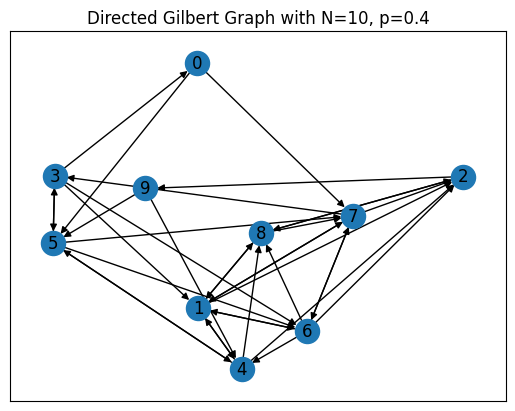

In [12]:
def gilbert_graph_directed(n, p):
    G = nx.DiGraph()
    G.add_nodes_from(range(n))
    for i in range(n):
        for j in range(n):
            if i != j and random.random() < p:
                G.add_edge(i, j)
    return G

G_directed_gilbert = gilbert_graph_directed(10, 0.4)

# Plotting the directed Gilbert graph
pos = nx.spring_layout(G_directed_gilbert)
nx.draw_networkx(G_directed_gilbert, pos)
plt.title("Directed Gilbert Graph with N=10, p=0.4")
plt.show()


# MILESTONE 2

Create a directed random graph with N = 10 nodes and p = 0.4 using the code from your solution for Milestone 1 b).
> *If you did not solve that question, use any function provided by NetworkX library to generate a directed random graph.*  

a) Compute the following centrality metrics: <Indegree, Outdegree, Closeness, Betweenness, PageRank> using the NetworkX functions with the same name. Print the obtained results.



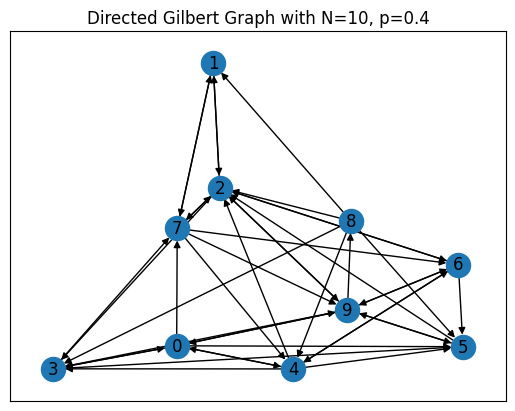

Indegree Centrality: {0: 0.3333333333333333, 1: 0.3333333333333333, 2: 0.7777777777777777, 3: 0.6666666666666666, 4: 0.4444444444444444, 5: 0.5555555555555556, 6: 0.4444444444444444, 7: 0.4444444444444444, 8: 0.1111111111111111, 9: 0.5555555555555556}
Outdegree Centrality: {0: 0.5555555555555556, 1: 0.2222222222222222, 2: 0.5555555555555556, 3: 0.2222222222222222, 4: 0.5555555555555556, 5: 0.3333333333333333, 6: 0.4444444444444444, 7: 0.5555555555555556, 8: 0.5555555555555556, 9: 0.6666666666666666}
Closeness Centrality: {0: 0.5625, 1: 0.6, 2: 0.8181818181818182, 3: 0.75, 4: 0.6, 5: 0.6428571428571429, 6: 0.6428571428571429, 7: 0.6428571428571429, 8: 0.45, 9: 0.6923076923076923}
Betweenness Centrality: {0: 0.05952380952380952, 1: 0.004629629629629629, 2: 0.17040343915343917, 3: 0.04910714285714285, 4: 0.054861111111111104, 5: 0.020833333333333332, 6: 0.03961640211640211, 7: 0.14540343915343915, 8: 0.013558201058201056, 9: 0.19206349206349205}
PageRank: {0: 0.09749157893298672, 1: 0.069

In [13]:
G = gilbert_graph_directed(10, 0.4)
# Plotting the directed Gilbert graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.title("Directed Gilbert Graph with N=10, p=0.4")
plt.show()

indegree = nx.in_degree_centrality(G)
outdegree = nx.out_degree_centrality(G)
closeness = nx.closeness_centrality(G)
betweenness = nx.betweenness_centrality(G)
pagerank = nx.pagerank(G)

print("Indegree Centrality:", indegree)
print("Outdegree Centrality:", outdegree)
print("Closeness Centrality:", closeness)
print("Betweenness Centrality:", betweenness)
print("PageRank:", pagerank)


Create a directed random graph with N = 10 nodes and p = 0.4 using the code from your solution for Milestone 1 b).
> *If you did not solve that question, use any function provided by NetworkX library to generate a directed random graph.*  

b) Write a code that computes the Indegree and Outdegree centrality for all nodes in the graph. *Note the code cannot use the function defined for this purpose in the NetworkX library*

Print the results of your solution along with the results obtained with the functions of NetworkX library to compute the Indegree and Outdegree centrality. **Note tha both, your solution and NetworkX functions should provide the same results**

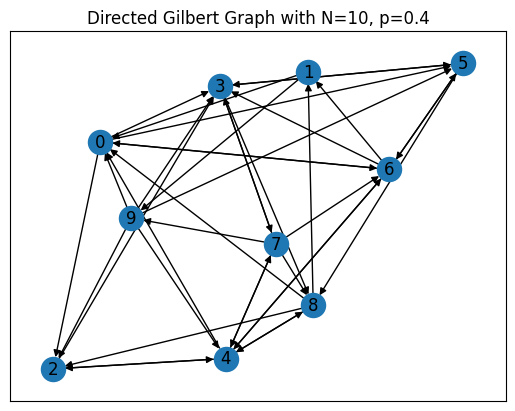

NetworkX Indegree Centrality: {0: 0.5555555555555556, 1: 0.2222222222222222, 2: 0.4444444444444444, 3: 0.6666666666666666, 4: 0.5555555555555556, 5: 0.4444444444444444, 6: 0.4444444444444444, 7: 0.2222222222222222, 8: 0.4444444444444444, 9: 0.2222222222222222}
NetworkX Outdegree Centrality: {0: 0.4444444444444444, 1: 0.2222222222222222, 2: 0.2222222222222222, 3: 0.3333333333333333, 4: 0.5555555555555556, 5: 0.3333333333333333, 6: 0.5555555555555556, 7: 0.5555555555555556, 8: 0.4444444444444444, 9: 0.5555555555555556}
Custom Indegree Centrality:  {0: 0.5555555555555556, 1: 0.2222222222222222, 2: 0.4444444444444444, 3: 0.6666666666666666, 4: 0.5555555555555556, 5: 0.4444444444444444, 6: 0.4444444444444444, 7: 0.2222222222222222, 8: 0.4444444444444444, 9: 0.2222222222222222}
Custom Outdegree Centrality: {0: 0.4444444444444444, 1: 0.2222222222222222, 2: 0.2222222222222222, 3: 0.3333333333333333, 4: 0.5555555555555556, 5: 0.3333333333333333, 6: 0.5555555555555556, 7: 0.5555555555555556, 8: 

In [14]:
G = gilbert_graph_directed(10, 0.4)
# Plotting the directed Gilbert graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.title("Directed Gilbert Graph with N=10, p=0.4")
plt.show()

# Custom function to calculate indegree centrality
def custom_indegree_centrality(G):
    centrality = {}  # Initialize an empty dictionary for centrality values
    for node in G.nodes():  # Iterate over all nodes
        # Calculate indegree centrality based on the number of incoming edges
        centrality[node] = G.in_degree(node) / (len(G.nodes()) - 1)
    return centrality  # Return the computed centrality values

# Custom function to calculate outdegree centrality
def custom_outdegree_centrality(G):
    centrality = {}  # Initialize an empty dictionary for centrality values
    for node in G.nodes():  # Iterate over all nodes
        # Calculate outdegree centrality based on the number of outgoing edges
        centrality[node] = G.out_degree(node) / (len(G.nodes()) - 1)
    return centrality  # Return the computed centrality values

indegree = nx.in_degree_centrality(G)
outdegree = nx.out_degree_centrality(G)

print("NetworkX Indegree Centrality:", indegree)
print("NetworkX Outdegree Centrality:", outdegree)

print("Custom Indegree Centrality: ", custom_indegree_centrality(G))
print("Custom Outdegree Centrality:", custom_outdegree_centrality(G))


Create a directed random graph with N = 10 nodes and p = 0.4 using the code from your solution for Milestone 1 b).
> *If you did not solve that question, use any function provided by NetworkX library to generate a directed random graph.*  

c) Write a code that computes the Closseness centrality for all nodes in the graph. *Note the code cannot use the function defined for this purpose in the NetworkX library*

Print the results of your solution along with the results obtained with the functions of NetworkX library to compute the Closseness centrality. **Note tha both, your solution and NetworkX functions should provide the same results**

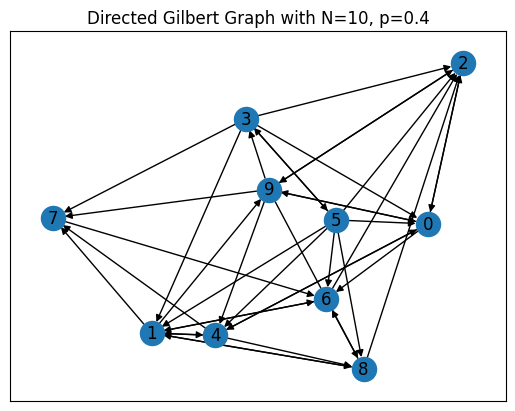

Custom Closeness Centrality:   {0: 0.6428571428571429, 1: 0.6428571428571429, 2: 0.75, 3: 0.42857142857142855, 4: 0.6, 5: 0.3103448275862069, 6: 0.6923076923076923, 7: 0.6428571428571429, 8: 0.6, 9: 0.5625}
NetworkX Closeness Centrality: {0: 0.6428571428571429, 1: 0.6428571428571429, 2: 0.75, 3: 0.42857142857142855, 4: 0.6, 5: 0.3103448275862069, 6: 0.6923076923076923, 7: 0.6428571428571429, 8: 0.6, 9: 0.5625}


In [16]:
G = gilbert_graph_directed(10, 0.4)
# Plotting the directed Gilbert graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.title("Directed Gilbert Graph with N=10, p=0.4")
plt.show()

def compute_closeness_centrality(G):
    closeness_centrality = {}  # Initialize an empty dictionary for centrality values

    for u in G.nodes:  # Iterate over all nodes in the graph
        # Calculate shortest path distances from all nodes to node u
        lengths = dict(nx.single_target_shortest_path_length(G, u))
        reachable_nodes = len(lengths)  # Count how many nodes can reach node u
        total_distance = sum(lengths.values())  # Sum of all shortest path lengths to u

        # If reachable nodes > 1 and total distance > 0, calculate closeness centrality
        if reachable_nodes > 1 and total_distance > 0:
            closeness_centrality[u] = (reachable_nodes - 1) / total_distance
        else:
            closeness_centrality[u] = 0.0  # If unreachable, set centrality to 0

    return closeness_centrality  # Return the computed closeness centrality values

my_closeness_centrality = compute_closeness_centrality(G)
nx_closeness_centrality = nx.closeness_centrality(G)

print("Custom Closeness Centrality:  ", my_closeness_centrality)
print("NetworkX Closeness Centrality:", nx_closeness_centrality)


Create a directed random graph with N = 10 nodes and p = 0.4 using the code from your solution for Milestone 1 b).
> *If you did not solve that question, use any function provided by NetworkX library to generate a directed random graph.*  

d) Write a code that computes the Betweenness centrality for all nodes in the graph. *Note the code cannot use the function defined for this purpose in the NetworkX library*

Print the results of your solution along with the results obtained with the functions of NetworkX library to compute the Betweenness centrality. **Note tha both, your solution and NetworkX functions should provide the same results**

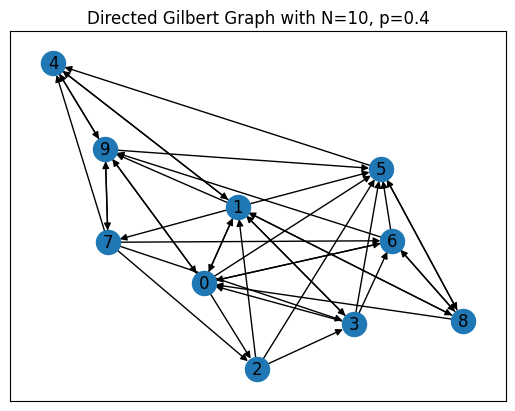

Custom Betweenness Centrality:   {0: 0.12152777777777778, 1: 0.2361111111111111, 2: 0.018518518518518517, 3: 0.039351851851851846, 4: 0.04861111111111111, 5: 0.0625, 6: 0.04050925925925926, 7: 0.053240740740740734, 8: 0.0763888888888889, 9: 0.08101851851851852}
NetworkX Betweenness Centrality: {0: 0.12152777777777778, 1: 0.2361111111111111, 2: 0.018518518518518517, 3: 0.039351851851851846, 4: 0.048611111111111105, 5: 0.0625, 6: 0.04050925925925925, 7: 0.053240740740740734, 8: 0.07638888888888888, 9: 0.0810185185185185}


In [17]:
def betweenness_centrality_manual(graph):
    # Initialize betweenness centrality for all nodes to 0
    betweenness = dict.fromkeys(graph, 0.0)

    for s in graph:  # Iterate through each node as the source node
        # Initialize variables for each source node
        S = []                      # Stack for the BFS
        P = {v: [] for v in graph}  # Predecessors of each node
        sigma = dict.fromkeys(graph, 0)  # Number of shortest paths to each node
        d = dict.fromkeys(graph, -1)     # Distance from the source node
        sigma[s] = 1                # Set the source node's path count to 1
        d[s] = 0                    # Set the source node's distance to 0
        Q = [s]                     # Queue to start BFS from the source node

        while Q:  # Perform breadth-first search (BFS)
            v = Q.pop(0)  # Dequeue node v
            S.append(v)   # Add node v to the stack
            for w in graph[v]:  # Iterate through neighbors of node v
                if d[w] < 0:  # If node w is found for the first time
                    Q.append(w)  # Add it to the queue
                    d[w] = d[v] + 1  # Set distance to w
                if d[w] == d[v] + 1:  # If v is a shortest path to w
                    sigma[w] += sigma[v]  # Add path count from v to w
                    P[w].append(v)  # Add v as a predecessor of w

        # Accumulate the betweenness centrality
        delta = dict.fromkeys(graph, 0)  # Initialize delta for all nodes
        while S:  # Process each node in the stack
            w = S.pop()  # Pop node w
            for v in P[w]:  # Iterate through predecessors of w
                delta[v] += (sigma[v] / sigma[w]) * (1 + delta[w])  # Update delta value
            if w != s:  # Exclude the source node
                betweenness[w] += delta[w]  # Add the delta value to betweenness

    # Normalize the betweenness centrality for an undirected graph
    n = len(graph)
    if n > 2:
        for v in betweenness:
            betweenness[v] /= ((n - 1) * (n - 2))  # Normalization factor

    return betweenness

G = gilbert_graph_directed(10, 0.4)
# Plotting the directed Gilbert graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.title("Directed Gilbert Graph with N=10, p=0.4")
plt.show()

# Custom Betweenness Centrality calculation
manual_betweenness = betweenness_centrality_manual(G)

# NetworkX Betweenness Centrality for comparison
networkx_betweenness = nx.betweenness_centrality(G)

print("Custom Betweenness Centrality:  ", manual_betweenness)
print("NetworkX Betweenness Centrality:", networkx_betweenness)


Create a directed random graph with N = 10 nodes and p = 0.4 using the code from your solution for Milestone 1 b).
> *If you did not solve that question, use any function provided by NetworkX library to generate a directed random graph.*  

d) Write a code that computes the Pagerank for all nodes in the graph. *Note the code cannot use the function defined for this purpose in the NetworkX library*
> Use a stop condition such that the sum of the Pagerank value of of all nodes in the graph for iteration i is < 10^-5 compared to iteration i-1.

Print the results of your solution along with the results obtained with the functions of NetworkX library to compute the Pagerank. **Note tha both, your solution and NetworkX functions should provide the same results.**



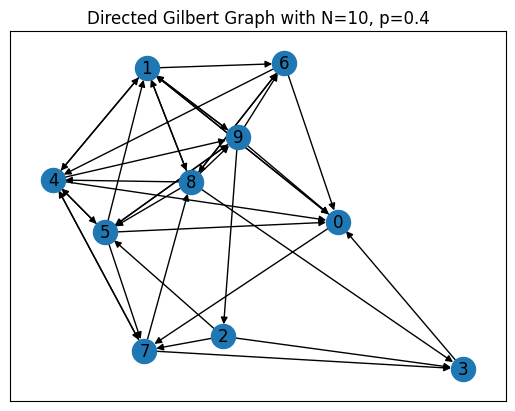

Custom PageRank:
Node 0: 0.1705
Node 1: 0.1491
Node 2: 0.0298
Node 3: 0.0737
Node 4: 0.1225
Node 5: 0.0728
Node 6: 0.0688
Node 7: 0.1291
Node 8: 0.0964
Node 9: 0.0872

NetworkX PageRank:
Node 0: 0.1705
Node 1: 0.1491
Node 2: 0.0298
Node 3: 0.0737
Node 4: 0.1225
Node 5: 0.0728
Node 6: 0.0688
Node 7: 0.1291
Node 8: 0.0964
Node 9: 0.0872


In [18]:
import random

def pagerank(G, alpha=0.85, tol=1e-5):
    N = len(G.nodes())
    pr = {node: 1 / N for node in G.nodes()}
    new_pr = {}
    dangling_nodes = [node for node in G.nodes() if G.out_degree(node) == 0]  # Nodes with no outgoing edges

    while True:
        # Calculate the PageRank contribution from dangling nodes
        dangling_sum = alpha * sum(pr[node] for node in dangling_nodes) / N

        # Update PageRank for each node
        for node in G.nodes():
            new_pr[node] = (1 - alpha) / N + dangling_sum
            for neighbor in G.predecessors(node):
                new_pr[node] += alpha * pr[neighbor] / G.out_degree(neighbor)

        # Check for convergence
        diff = sum(abs(new_pr[node] - pr[node]) for node in G.nodes())
        if diff < tol:
            break

        pr = new_pr.copy()

    return pr

# Create a directed Gilbert graph
def gilbert_graph_directed(n, p):
    G = nx.DiGraph()
    G.add_nodes_from(range(n))
    for i in range(n):
        for j in range(n):
            if i != j and random.random() < p:
                G.add_edge(i, j)
    return G

G_directed_gilbert = gilbert_graph_directed(10, 0.4)

# Plotting the directed Gilbert graph
pos = nx.spring_layout(G_directed_gilbert)
nx.draw_networkx(G_directed_gilbert, pos)
plt.title("Directed Gilbert Graph with N=10, p=0.4")
plt.show()

# Calculate PageRank using the updated custom implementation
pr_custom = pagerank(G_directed_gilbert)

# Calculate PageRank using NetworkX
pr_nx = nx.pagerank(G_directed_gilbert)

# Print the results for comparison
print("Custom PageRank:")
for node, rank in pr_custom.items():
    print(f"Node {node}: {rank:.4f}")

print("\nNetworkX PageRank:")
for node, rank in pr_nx.items():
    print(f"Node {node}: {rank:.4f}")


# MILESTONE 3
Create an undirected random graph with N = 10 nodes and p = 0.4 using the code from your solution for Milestone 1 b).
> *If you did not solve that question, use any function provided by NetworkX library to generate an undirected random graph.*  

a) Write a code that  implements the k-core decomposition of a graph. The code should provide the k-core and the layer for each node in the graph. *Note the code cannot use the function defined for this purpose in the NetworkX library*

Print the results of your solution along with the results obtained with the functions of NetworkX library to compute the k-core (```core_number```) and layer (```onion_layers```). **Note tha both, your solution and NetworkX functions should provide the same results**


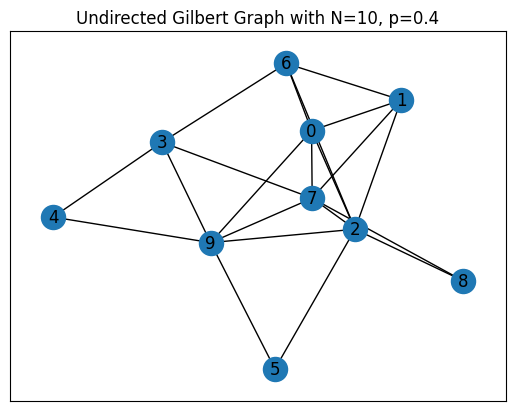

Custom K-Cores:   {0: 3, 1: 3, 2: 3, 3: 3, 4: 2, 5: 2, 6: 3, 7: 3, 8: 2, 9: 3}
Custom Layers:    {0: 4, 1: 4, 2: 4, 3: 2, 4: 1, 5: 1, 6: 3, 7: 4, 8: 1, 9: 3}

NetworkX K-Cores: {0: 3, 1: 3, 2: 3, 3: 3, 4: 2, 5: 2, 6: 3, 7: 3, 8: 2, 9: 3}
NetworkX Layers:  {0: 4, 1: 4, 2: 4, 3: 2, 4: 1, 5: 1, 6: 3, 7: 4, 8: 1, 9: 3}


In [19]:
# Custom function for k-core decomposition
def k_core_decomposition(graph):
    """
    Compute the k-core decomposition of a graph.
    A k-core is a maximal subgraph where every node has at least k degree.
    Returns:
        - core_dict: A dictionary where keys are nodes and values are k-core values.
    """
    core_dict = {}  # This will store the core number (k-core value) for each node.
    graph_copy = graph.copy()  # Use a copy to avoid modifying the original graph.
    degree_dict = dict(graph_copy.degree())  # Get the initial degree of all nodes in the graph.
    current_k = 0  # Start the decomposition with k = 0.

    while degree_dict:  # Continue processing until all nodes are removed.
        # Identify nodes whose degree is less than or equal to the current k.
        # These nodes cannot belong to a higher k-core.
        to_remove = [node for node, degree in degree_dict.items() if degree <= current_k]

        if not to_remove:  # If no nodes meet the condition, increment k.
            current_k += 1
            continue

        # Remove identified nodes and assign their k-core value.
        for node in to_remove:
            core_dict[node] = current_k  # Store the current k-core value for the node.
            graph_copy.remove_node(node)  # Remove the node from the graph.

        # Update the degree dictionary after removing nodes.
        # This ensures subsequent calculations reflect the reduced graph structure.
        degree_dict = dict(graph_copy.degree())

    # Return the final k-core dictionary containing core numbers for all nodes.
    return core_dict


def onion_decomposition(graph):
    """
    Compute the onion decomposition (layers) of a graph.
    A layer corresponds to the order in which nodes are removed,
    starting with nodes of the smallest degree.
    Returns:
        - layer_dict: A dictionary where keys are nodes and values are the layer numbers.
    """
    graph_copy = graph.copy()  # Use a copy to preserve the original graph structure.
    layer_dict = {}  # This will store the layer number for each node.
    current_layer = 1  # Start with the first layer.

    while graph_copy.nodes:  # Continue processing until all nodes are removed.
        # Find nodes with the smallest degree in the graph.
        # These nodes are most vulnerable to removal and define the current layer.
        min_degree_nodes = [
            node for node, degree in graph_copy.degree()
            if degree == min(dict(graph_copy.degree()).values())
        ]

        # Assign the current layer number to all nodes with the smallest degree.
        for node in min_degree_nodes:
            layer_dict[node] = current_layer  # Mark the node as part of the current layer.
            graph_copy.remove_node(node)  # Remove the node from the graph.

        # Increment the layer count to reflect progression through the decomposition.
        current_layer += 1

    # Return the final layer dictionary containing layer numbers for all nodes.
    return layer_dict


# Create an undirected Gilbert graph
G_undirected = gilbert_graph_undirected(10, 0.4)

# Plotting the undirected Gilbert graph
pos = nx.spring_layout(G_undirected)  # Spring layout for better visualization
nx.draw_networkx(G_undirected, pos)  # Draw the graph using NetworkX
plt.title("Undirected Gilbert Graph with N=10, p=0.4")  # Add title to the plot
plt.show()

# Perform custom K-core decomposition
k_cores = k_core_decomposition(G_undirected)  # Compute k-cores using custom function
layers = onion_decomposition(G_undirected)  # Compute layers using custom function

# NetworkX K-core decomposition results
networkx_k_cores = nx.core_number(G_undirected)  # Compute k-cores using NetworkX
networkx_layers = nx.onion_layers(G_undirected)  # Compute layers using NetworkX

# Sort custom results by node IDs
sorted_k_cores = {node: k_cores[node] for node in sorted(k_cores.keys())}  # Sort by node IDs
sorted_layers = {node: layers[node] for node in sorted(layers.keys())}  # Sort by node IDs

# Sort NetworkX K-core and Layer results by node IDs
sorted_networkx_k_cores = {node: networkx_k_cores[node] for node in sorted(networkx_k_cores.keys())}
sorted_networkx_layers = {node: networkx_layers[node] for node in sorted(networkx_layers.keys())}

print("Custom K-Cores:  ", sorted_k_cores)  # Display k-core values from custom function
print("Custom Layers:   ", sorted_layers)  # Display layer values from custom function
print()

# Print NetworkX K-core decomposition results for comparison
print("NetworkX K-Cores:", sorted_networkx_k_cores)  # Display k-core values from NetworkX
print("NetworkX Layers: ", sorted_networkx_layers)  # Display layer values from NetworkX


# MILESTONE 4

a) Write a code that computes the modularity giving a Graph and the communities within that graph.

Consider the following predefined graphs available in the NetworkX library: karate_club_graph, davis_southern_women_graph, florentine_families_graph and les_miserables_graph.

For each of these graphs compute the existing communities using the following community detection algorithms available in NetworkX:
*  ```label_propagation_communities``` (you have to ``` import networkx.algorithms.community```).
* ```greedy_modularity_communities``` (you have to ```import networkx.algorithms.community```).
* ```community_louvain.best_partition``` (you have to ``` import from community import community_louvain```).

b) For each of the 4 predefined graphs compute the resulting modularity and execution time of each of the 3 considered community detection algorithms. Print the results of the two metrics.

c) Which is the best algorithms based on the modularity and execution time metrics?


**Note that you can validate your code to compute modularity is correct by comparing the obtained results with those provided by the modularity function offered by the NetworkX library: ```modularity```(you have to ```import networkx.algorithms.community```).**



In [20]:
# Importing required libraries and functions for graph analysis and community detection
import networkx as nx  # For working with graphs
import time  # To measure execution time
from networkx.algorithms.community import (
    label_propagation_communities,  # Label propagation algorithm
    greedy_modularity_communities,  # Greedy modularity maximization algorithm
    modularity,  # NetworkX built-in modularity calculation
)
from community import community_louvain  # Louvain method for community detection

# Part a: Function to compute modularity using a custom formula
def compute_modularity(G, communities, weight="weight", resolution=1):
    """
    Calculate modularity for a given graph and its communities.

    Parameters:
    - G: The input graph (NetworkX Graph object).
    - communities: List of sets, each containing nodes of a community.
    - weight: Attribute name for edge weights (default: "weight").
    - resolution: Modularity resolution parameter (default: 1).

    Returns:
    - Modularity score as a float.
    """
    m = G.size(weight=weight)  # Total weight of all edges in the graph
    if m == 0:  # Check if the graph has edges; modularity is undefined otherwise
        raise ValueError("Graph has no edges.")

    modularity = 0.0  # Initialize modularity accumulator

    # Loop through each community in the list
    for community in communities:
        intra_weight = 0.0  # Total weight of edges within the community
        degree_sum = 0.0  # Total degree of all nodes in the community

        for node in community:  # Iterate over nodes in the community
            degree_sum += G.degree(node, weight=weight)  # Add node degree to total
            for neighbor, edge_data in G[node].items():  # Iterate over node's neighbors
                if neighbor in community:  # Check if the neighbor is in the same community
                    intra_weight += edge_data.get(weight, 1)  # Add edge weight (default is 1)

        # For undirected graphs, intra_weight is counted twice, so divide by 2
        if not G.is_directed():
            intra_weight /= 2

        # Update modularity based on the community's contribution
        modularity += (intra_weight / m) - resolution * ((degree_sum / (2 * m)) ** 2)

    return modularity  # Return the computed modularity value


# Part a: Function to analyze communities and validate modularity calculations
def community_analysis_with_validation(G):
    """
    Detect communities, compute modularity, and validate using NetworkX.

    Parameters:
    - G: The input graph (NetworkX Graph object).

    Returns:
    - Dictionary of results, including modularity and execution times for each algorithm.
    """
    results = {}  # Dictionary to store results for each algorithm

    # Label Propagation Algorithm
    start = time.time()  # Start timing
    lp_communities = list(label_propagation_communities(G))  # Detect communities
    lp_modularity_custom = compute_modularity(G, lp_communities)  # Custom modularity calculation
    lp_modularity_nx = modularity(G, lp_communities)  # Built-in modularity validation
    results["Label Propagation"] = (
        lp_modularity_custom,  # Custom modularity result
        lp_modularity_nx,      # NetworkX modularity result
        time.time() - start    # Execution time
    )

    # Greedy Modularity Maximization Algorithm
    start = time.time()  # Restart timing
    gm_communities = list(greedy_modularity_communities(G))  # Detect communities
    gm_modularity_custom = compute_modularity(G, gm_communities)  # Custom modularity calculation
    gm_modularity_nx = modularity(G, gm_communities)  # Built-in modularity validation
    results["Greedy Modularity"] = (
        gm_modularity_custom,  # Custom modularity result
        gm_modularity_nx,      # NetworkX modularity result
        time.time() - start    # Execution time
    )

    # Louvain Algorithm
    start = time.time()  # Restart timing
    louvain_partition = community_louvain.best_partition(G)  # Louvain partition as {node: community_id}
    # Convert the Louvain partition into a list of communities
    louvain_communities = {community_id: [] for community_id in set(louvain_partition.values())}
    for node, community_id in louvain_partition.items():  # Group nodes by community ID
        louvain_communities[community_id].append(node)
    # Calculate modularity using both custom and built-in methods
    louvain_modularity_custom = compute_modularity(G, list(louvain_communities.values()))
    louvain_modularity_nx = modularity(G, list(louvain_communities.values()))
    results["Louvain"] = (
        louvain_modularity_custom,  # Custom modularity result
        louvain_modularity_nx,      # NetworkX modularity result
        time.time() - start         # Execution time
    )

    return results  # Return results dictionary


# Part b: Predefined graphs for analysis
graphs = {
    "Karate Club": nx.karate_club_graph(),                   # Social network of a karate club
    "Davis Southern Women": nx.davis_southern_women_graph(), # Attendance at social events
    "Florentine Families": nx.florentine_families_graph(),   # Marriage ties between families
    "Les Miserables": nx.les_miserables_graph(),             # Co-occurrence of characters in the novel
}

# Loop through each graph to compute and display results
for graph_name, G in graphs.items():
    print(f"\nResults for {graph_name}:")  # Header for graph results
    results = community_analysis_with_validation(G)  # Analyze communities for this graph

    # Initialize variables to track the best algorithm
    best_algorithm = None  # Variable to store the name of the best algorithm (based on modularity and time)
    best_modularity = -float("inf")  # Set initial modularity to negative infinity, so any calculated modularity is better
    best_time = float("inf")  # Set initial execution time to positive infinity, so any time will be better

    # Loop through results for each algorithm to print and find the best one
    for algorithm, (custom_modularity, nx_modularity, exec_time) in results.items():
        print(
            f"  {algorithm} - Custom Modularity: {custom_modularity:.6f}, "
            f"NetworkX Modularity: {nx_modularity:.6f}, Time: {exec_time:.6f} sec"
        )

        # Update the best algorithm based on modularity and execution time
        if custom_modularity > best_modularity or (
            custom_modularity == best_modularity and exec_time < best_time
        ):
            best_algorithm = algorithm
            best_modularity = custom_modularity
            best_time = exec_time

    # Print the best algorithm for this graph
    print(f"  Best Algorithm (based on modularity): {best_algorithm}")



Results for Karate Club:
  Label Propagation - Custom Modularity: 0.309486, NetworkX Modularity: 0.309486, Time: 0.002074 sec
  Greedy Modularity - Custom Modularity: 0.410965, NetworkX Modularity: 0.410965, Time: 0.005955 sec
  Louvain - Custom Modularity: 0.434521, NetworkX Modularity: 0.434521, Time: 0.002714 sec
  Best Algorithm (based on modularity): Louvain

Results for Davis Southern Women:
  Label Propagation - Custom Modularity: 0.040904, NetworkX Modularity: 0.040904, Time: 0.001969 sec
  Greedy Modularity - Custom Modularity: 0.314670, NetworkX Modularity: 0.314670, Time: 0.005280 sec
  Louvain - Custom Modularity: 0.332471, NetworkX Modularity: 0.332471, Time: 0.002858 sec
  Best Algorithm (based on modularity): Louvain

Results for Florentine Families:
  Label Propagation - Custom Modularity: 0.335000, NetworkX Modularity: 0.335000, Time: 0.000467 sec
  Greedy Modularity - Custom Modularity: 0.398750, NetworkX Modularity: 0.398750, Time: 0.001258 sec
  Louvain - Custom Mo

**c) Which is the best algorithms based on the modularity and execution time metrics?**

The best algorithm varies for each type of graph, but usually **Louvain** performs pretty well. Here is what we found for each type of graph:

1. **Karate Club:** The best algorithm is **Louvain**, achieving the highest modularity while maintaining a relatively fast execution time. Greedy Modularity also performs well but is slower.

2. **Davis Southern Women:** The best algorithm is **Louvain**, with the highest modularity and a quick execution time. Greedy Modularity is close in modularity but takes longer to execute.

3. **Florentine Families:** The best algorithm is **Greedy Modularity**, achieving the highest modularity with a marginally slower execution time compared to Louvain. Louvain is very competitive in modularity but slightly less effective.

4. **Les Miserables:** The best algorithm is **Louvain**, delivering the highest modularity with reasonable execution time. Label Propagation is notably faster but achieves a lower modularity score.

### Summary:
The **Louvain** algorithm generally stands out as the best choice for modularity while maintaining good execution times across most graphs. Greedy Modularity is competitive in modularity for some graphs but tends to be slower, and Label Propagation is the fastest but less effective in modularity.
